In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt,nInst) = df.shape
    return (df.values).T

pricesFile="./prices.txt"
prices = loadPrices(pricesFile)

train_prices = prices[:, :500]
test_prices = prices[:, 500:]

In [118]:
returns = np.diff(np.log(prices), axis=1)
returns_df = pd.DataFrame(returns.T)
returns_df['Time'] = np.arange(1, nt)
fig = px.line(returns_df, x='Time', y=returns_df.columns[:-1], labels={'value': 'Log Returns', 'Time': 'Time'}, title='Log Returns of Prices')
fig.show()

In [134]:
fig = px.histogram(returns[14], nbins=30, labels={'value': 'Returns'}, title='Histogram of Returns for Instrument 12')
fig.show()

Testing for normality

In [123]:
from scipy.stats import jarque_bera

jb_pvalues = np.zeros(nInst)
for inst in range(nInst):
    stat, p = jarque_bera(returns[inst])
    jb_pvalues[inst] = p
    print(f"Instrument {inst}: JB p-value = {p:.4e}")

print("Number of instruments with p < 0.05 (reject normality):", np.sum(jb_pvalues < 0.01))
print("Instrument indices with p < 0.05 (reject normality):", np.where(jb_pvalues < 0.01)[0])

# A rolling window is not strictly needed for a global normality test, but can be used to check for time-varying normality.

Instrument 0: JB p-value = 8.4376e-01
Instrument 1: JB p-value = 4.7123e-01
Instrument 2: JB p-value = 9.7306e-01
Instrument 3: JB p-value = 5.3655e-01
Instrument 4: JB p-value = 2.2470e-01
Instrument 5: JB p-value = 3.1793e-01
Instrument 6: JB p-value = 6.0199e-02
Instrument 7: JB p-value = 2.5303e-01
Instrument 8: JB p-value = 1.7165e-01
Instrument 9: JB p-value = 4.1589e-01
Instrument 10: JB p-value = 8.6942e-01
Instrument 11: JB p-value = 4.8577e-01
Instrument 12: JB p-value = 2.1436e-02
Instrument 13: JB p-value = 2.9443e-01
Instrument 14: JB p-value = 6.1419e-01
Instrument 15: JB p-value = 1.6190e-01
Instrument 16: JB p-value = 5.1858e-01
Instrument 17: JB p-value = 4.3156e-01
Instrument 18: JB p-value = 5.5384e-01
Instrument 19: JB p-value = 7.7870e-01
Instrument 20: JB p-value = 5.4079e-01
Instrument 21: JB p-value = 8.3323e-01
Instrument 22: JB p-value = 7.1417e-01
Instrument 23: JB p-value = 6.5073e-02
Instrument 24: JB p-value = 6.4934e-01
Instrument 25: JB p-value = 5.2357e

Testing for stationarity

In [116]:
from statsmodels.tsa.stattools import adfuller
from tqdm import trange

# Check stationarity of each asset's returns using Augmented Dickey-Fuller test
adf_results = []
window = 200
prop_stationary = np.zeros(nInst)

for i in trange(nInst):
    stationary_count = 0
    total_windows = 0
    for start in range(0, returns.shape[1] - window + 1):
        segment = returns[i, start:start+window]
        result = adfuller(segment)
        if result[1] < 0.01:
            stationary_count += 1
        total_windows += 1
    prop_stationary[i] = stationary_count / total_windows if total_windows > 0 else np.nan
    adf_results.append({'inst': i, 'prop_stationary': prop_stationary[i]})
    print(f"Inst {i}: {prop_stationary[i]:.2%}")


  2%|▏         | 1/50 [00:02<01:53,  2.32s/it]

Inst 0: 100.00%


  4%|▍         | 2/50 [00:04<01:47,  2.24s/it]

Inst 1: 100.00%


  6%|▌         | 3/50 [00:06<01:49,  2.32s/it]

Inst 2: 100.00%


  8%|▊         | 4/50 [00:09<01:47,  2.33s/it]

Inst 3: 100.00%


 10%|█         | 5/50 [00:12<02:03,  2.75s/it]

Inst 4: 100.00%


 12%|█▏        | 6/50 [00:15<01:58,  2.70s/it]

Inst 5: 100.00%


 14%|█▍        | 7/50 [00:18<02:07,  2.97s/it]

Inst 6: 100.00%


 16%|█▌        | 8/50 [00:22<02:17,  3.27s/it]

Inst 7: 100.00%


 18%|█▊        | 9/50 [00:27<02:27,  3.60s/it]

Inst 8: 100.00%


 20%|██        | 10/50 [00:30<02:15,  3.38s/it]

Inst 9: 100.00%


 22%|██▏       | 11/50 [00:32<02:01,  3.11s/it]

Inst 10: 100.00%


 24%|██▍       | 12/50 [00:36<02:04,  3.28s/it]

Inst 11: 100.00%


 26%|██▌       | 13/50 [00:41<02:19,  3.76s/it]

Inst 12: 100.00%


 28%|██▊       | 14/50 [00:45<02:17,  3.83s/it]

Inst 13: 100.00%


 30%|███       | 15/50 [00:49<02:23,  4.10s/it]

Inst 14: 100.00%


 32%|███▏      | 16/50 [00:54<02:25,  4.29s/it]

Inst 15: 100.00%


 34%|███▍      | 17/50 [00:58<02:23,  4.34s/it]

Inst 16: 100.00%


 36%|███▌      | 18/50 [01:02<02:11,  4.12s/it]

Inst 17: 100.00%


 38%|███▊      | 19/50 [01:05<01:53,  3.66s/it]

Inst 18: 100.00%


 40%|████      | 20/50 [01:07<01:38,  3.28s/it]

Inst 19: 100.00%


 42%|████▏     | 21/50 [01:09<01:27,  3.01s/it]

Inst 20: 99.45%


 44%|████▍     | 22/50 [01:12<01:23,  2.97s/it]

Inst 21: 100.00%


 46%|████▌     | 23/50 [01:15<01:21,  3.03s/it]

Inst 22: 97.82%


 48%|████▊     | 24/50 [01:18<01:15,  2.90s/it]

Inst 23: 100.00%


 50%|█████     | 25/50 [01:21<01:09,  2.78s/it]

Inst 24: 86.91%


 52%|█████▏    | 26/50 [01:24<01:12,  3.02s/it]

Inst 25: 99.45%


 54%|█████▍    | 27/50 [01:27<01:07,  2.94s/it]

Inst 26: 100.00%


 56%|█████▌    | 28/50 [01:30<01:03,  2.87s/it]

Inst 27: 100.00%


 58%|█████▊    | 29/50 [01:32<00:57,  2.75s/it]

Inst 28: 96.55%


 60%|██████    | 30/50 [01:35<00:57,  2.90s/it]

Inst 29: 100.00%


 62%|██████▏   | 31/50 [01:38<00:53,  2.80s/it]

Inst 30: 100.00%


 64%|██████▍   | 32/50 [01:40<00:48,  2.69s/it]

Inst 31: 100.00%


 66%|██████▌   | 33/50 [01:43<00:47,  2.82s/it]

Inst 32: 100.00%


 68%|██████▊   | 34/50 [01:46<00:45,  2.82s/it]

Inst 33: 99.27%


 70%|███████   | 35/50 [01:49<00:41,  2.76s/it]

Inst 34: 100.00%


 72%|███████▏  | 36/50 [01:51<00:37,  2.68s/it]

Inst 35: 100.00%


 74%|███████▍  | 37/50 [01:54<00:33,  2.58s/it]

Inst 36: 94.00%


 76%|███████▌  | 38/50 [01:56<00:30,  2.57s/it]

Inst 37: 100.00%


 78%|███████▊  | 39/50 [01:59<00:27,  2.51s/it]

Inst 38: 100.00%


 80%|████████  | 40/50 [02:01<00:24,  2.47s/it]

Inst 39: 100.00%


 82%|████████▏ | 41/50 [02:03<00:22,  2.47s/it]

Inst 40: 100.00%


 84%|████████▍ | 42/50 [02:06<00:20,  2.54s/it]

Inst 41: 96.18%


 86%|████████▌ | 43/50 [02:09<00:17,  2.51s/it]

Inst 42: 100.00%


 88%|████████▊ | 44/50 [02:11<00:15,  2.57s/it]

Inst 43: 100.00%


 90%|█████████ | 45/50 [02:14<00:13,  2.62s/it]

Inst 44: 95.64%


 92%|█████████▏| 46/50 [02:17<00:10,  2.62s/it]

Inst 45: 100.00%


 94%|█████████▍| 47/50 [02:19<00:07,  2.64s/it]

Inst 46: 100.00%


 96%|█████████▌| 48/50 [02:22<00:05,  2.62s/it]

Inst 47: 100.00%


 98%|█████████▊| 49/50 [02:24<00:02,  2.59s/it]

Inst 48: 100.00%


100%|██████████| 50/50 [02:27<00:00,  2.95s/it]

Inst 49: 100.00%


Volatility forecasting

In [41]:
from arch import arch_model
from sklearn.metrics import mean_squared_error
from tqdm import trange

def rolling_garch_vol(train, test, p=30, q=30):
    T_train = len(train)
    T_test = len(test)
    vols = np.zeros(T_test)
    history = train.copy()

    for i in trange(T_test):
        am = arch_model(history*100, vol='Arch', p=p, q=q, mean='Zero')
        res = am.fit(disp='off')
        f = res.forecast(horizon=1)
        vols[i] = f.variance.values[-1, 0]
        history = np.append(history, test[i])
    
    return vols

train0 = returns[0, :500]
test0 = returns[0, 500:]
vol_pred = rolling_garch_vol(train0, test0)

realized = (test0 * 100) ** 2
mse_garch = mean_squared_error(realized, vol_pred)
print(f'Mean Squared Error of GARCH(1,1) Volatility Prediction: {mse_garch:.4f}')


100%|██████████| 249/249 [01:07<00:00,  3.67it/s]

Mean Squared Error of GARCH(1,1) Volatility Prediction: 0.0799


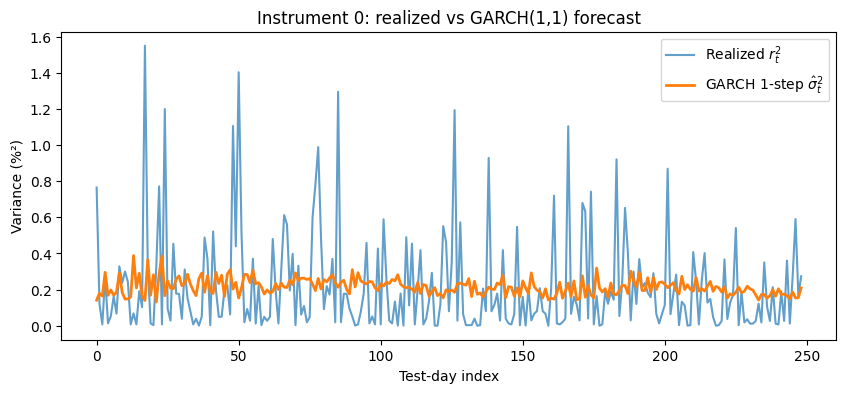

In [42]:
plt.figure(figsize=(10, 4))
plt.plot(realized, label='Realized $r_t^2$', alpha=0.7)
plt.plot(vol_pred,  label='GARCH 1-step $\hat\sigma^2_{t}$', linewidth=2)
plt.title("Instrument 0: realized vs GARCH(1,1) forecast")
plt.xlabel("Test-day index")
plt.ylabel("Variance (%²)")
plt.legend()
plt.show()


20-day rolling var MSE: 0.06580303403309108


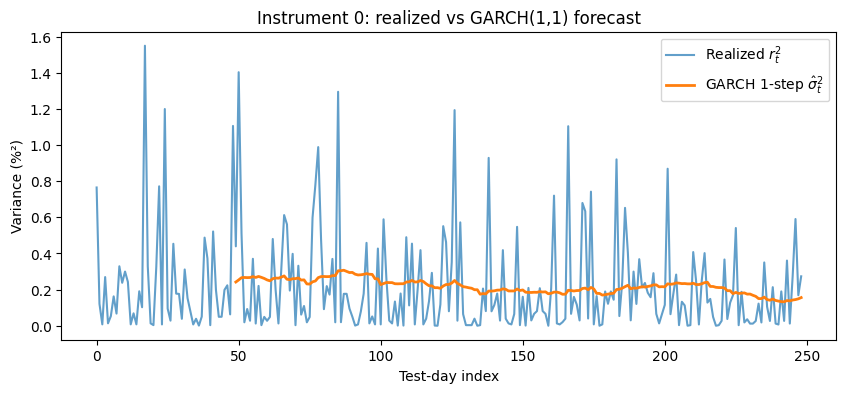

In [47]:
# 20-day rolling realized variance (in %²)
rolling_var_20 = pd.Series(test0 * 100).rolling(50).var().dropna().values
# align lengths
rv20 = np.concatenate([np.full(49, np.nan), rolling_var_20])

mse_rolling20 = mean_squared_error(realized[49:], rv20[49:])
print("20-day rolling var MSE:", mse_rolling20)

plt.figure(figsize=(10, 4))
plt.plot(realized, label='Realized $r_t^2$', alpha=0.7)
plt.plot(rv20,  label='GARCH 1-step $\hat\sigma^2_{t}$', linewidth=2)
plt.title("Instrument 0: realized vs GARCH(1,1) forecast")
plt.xlabel("Test-day index")
plt.ylabel("Variance (%²)")
plt.legend()
plt.show()


In [45]:
lam = 0.94
returns_pct = pd.Series(test0 * 100)

# EWMA variance
ewma_var = returns_pct.ewm(alpha=1-lam).var().values

# Remove NaNs for fair comparison
mask = ~np.isnan(ewma_var)
mse_ewma = mean_squared_error(realized[mask], ewma_var[mask])
print("EWMA var MSE:", mse_ewma)


EWMA var MSE: 0.06738699927100784


Predicting modelling returns

In [108]:
df = pd.DataFrame(train_prices.T, columns=[f'Instrument {i}' for i in range(nInst)])
train = []
for inst in range(nInst):
    rets = np.log(df.iloc[:, inst] / df.iloc[:, inst].shift(1)) * 100
    tmp = pd.DataFrame({
        # 'inst': inst,
        # 'price': p,
        'lret': rets,
        'ema_3': rets.ewm(span=3, adjust=False).mean(),
        'ema_8': rets.ewm(span=8, adjust=False).mean(),
        'ma_5': rets.rolling(window=10).mean(),
        'mom_5': rets / (rets.shift(5)+1e-6) - 1,
        'vol_10': rets.rolling(window=10).std(),
        'fret': rets.shift(-1),
        'direction': np.sign(rets.shift(-1)),
    })
    train.append(tmp)
train = pd.concat(train).dropna().reset_index(drop=True)

df = pd.DataFrame(test_prices.T, columns=[f'Instrument {i}' for i in range(nInst)])
test = []
for inst in range(nInst):
    rets = np.log(df.iloc[:, inst] / df.iloc[:, inst].shift(1)) * 100
    tmp = pd.DataFrame({
        # 'inst': inst,
        # 'price': p,
        'lret': rets,
        'ema_3': rets.ewm(span=3, adjust=False).mean(),
        'ema_8': rets.ewm(span=8, adjust=False).mean(),
        'ma_5': rets.rolling(window=5).mean(),
        'mom_5': rets / (rets.shift(5)+1e-6) - 1,
        'vol_10': rets.rolling(window=10).std(),
        'fret': rets.shift(-1),
        'direction': np.sign(rets.shift(-1)),
    })
    test.append(tmp)
test = pd.concat(test).dropna().reset_index(drop=True)

In [102]:
from sklearn.metrics import mean_squared_error
ema_signal = test['ema_3']
mse_ema = mean_squared_error(test['fret'], ema_signal)
dir_acc_ema = np.mean(np.sign(test['fret']) == np.sign(ema_signal))
print(f'Mean Squared Error of EMA Signal: {mse_ema:.4f}')
print(f'Direction Accuracy of EMA Signal: {dir_acc_ema:.4f}')

Mean Squared Error of EMA Signal: 1.2651
Direction Accuracy of EMA Signal: 0.4982


In [110]:
from xgboost import XGBClassifier

# Map direction labels from {-1, 0, 1} to {0, 1, 2}
direction_map = {-1.0: 0, 0.0: 1, 1.0: 2}
X_train = train.drop(['fret', 'direction'], axis=1)
y_train = train['direction'].map(direction_map)
X_test = test.drop(['fret', 'direction'], axis=1)
y_test = test['direction'].map(direction_map)

model = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Map predictions and y_test back to original labels if needed
# y_pred_orig = y_pred.map({0: -1, 1: 0, 2: 1}) # if you want to compare with original

dir_acc_xgb = np.mean(y_pred == y_test)
print(f'Direction Accuracy of XGBoost Model: {dir_acc_xgb:.4f}')

Direction Accuracy of XGBoost Model: 0.4957


In [71]:
from sklearn.linear_model import LinearRegression

X_train_lr = train.drop('fret', axis=1)
y_train_lr = train['fret']
X_test_lr = test.drop('fret', axis=1)
y_test_lr = test['fret']

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
dir_acc_lr = (np.sign(y_pred_lr) == np.sign(y_test_lr)).mean()
print(f"Mean Squared Error of Linear Regression: {mse_lr:.6f}")
print(f"Direction Accuracy of Linear Regression: {dir_acc_lr:.4f}")

Mean Squared Error of Linear Regression: 0.000095
Direction Accuracy of Linear Regression: 0.4910


In [92]:
baseline = np.zeros_like(y_test)
mse_baseline = mean_squared_error(y_test, baseline)
print(f"Mean Squared Error of Baseline (Zero Prediction): {mse_baseline:.4f}")

Mean Squared Error of Baseline (Zero Prediction): 0.9517


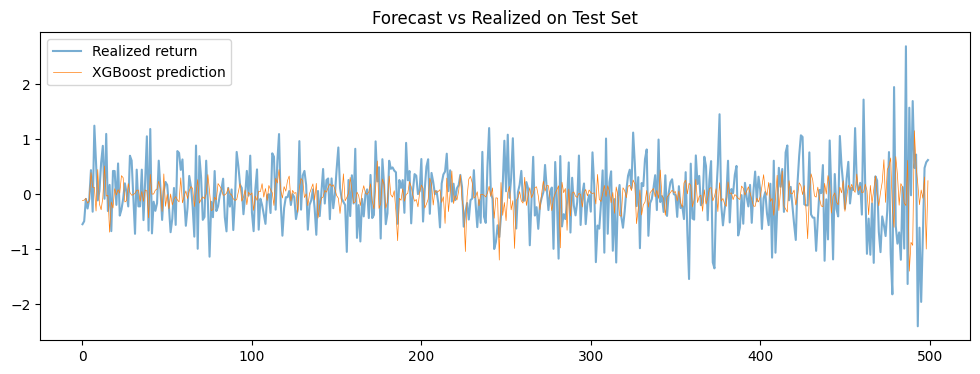

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(test['fret'][:500].values, label='Realized return', alpha=0.6)
# plt.plot(ema_signal[:500],  label='EMA(5–20) signal', linewidth=0.5)
plt.plot(y_pred[:500],  label='XGBoost prediction', linewidth=.5)
plt.legend(); plt.title("Forecast vs Realized on Test Set")
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

returns = train_prices[:, 1:] / train_prices[:, :-1]

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=False)
mse_scores = np.zeros((nInst, n_splits))

for inst in range(nInst):
    X = train_prices[inst, :-1].reshape(-1, 1)
    y = returns[inst]
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        model = XGBRegressor(n_estimators=100, random_state=42)
        model.fit(X[train_idx], y[train_idx])
        preds = model.predict(X[val_idx])
        mse_scores[inst, fold] = mean_squared_error(y[val_idx], preds)

print("Mean MSE per instrument:", mse_scores.mean(axis=1))
print("Overall mean MSE:", mse_scores.mean())

Mean MSE per instrument: [2.74112585e-05 4.21669990e-05 3.17235751e-04 1.68204462e-04
 7.27679262e-05 4.33669760e-05 1.67877926e-04 1.67557580e-04
 2.80287937e-04 2.83078615e-04 2.12154229e-04 2.57185673e-04
 1.91356163e-04 4.01721398e-05 2.41209409e-04 3.65833172e-05
 1.17711076e-04 1.17680790e-04 1.48670358e-04 3.27117855e-05
 3.00207069e-05 9.27512910e-05 2.81637406e-04 1.18601098e-04
 3.85678428e-05 1.38473251e-04 1.00035493e-04 3.31395658e-04
 2.12607713e-04 2.67339421e-04 1.06909634e-04 8.53612770e-05
 2.66125559e-04 2.15812192e-04 1.00383718e-04 1.33324564e-04
 7.57523304e-05 3.02333528e-04 2.33582266e-05 3.95058438e-05
 4.61616261e-05 2.27381463e-04 1.66503013e-04 2.75563301e-04
 5.24035117e-05 3.05078252e-05 1.39714423e-04 1.12536746e-04
 3.34553465e-05 1.15927485e-04]
Overall mean MSE: 0.0001425168373089133


In [ ]:
test_returns = test_prices[:, 1:] / test_prices[:, :-1]
for inst in range(nInst):
    X_test = test_prices[inst, :-1].reshape(-1, 1)
    y_test = test_returns[inst]
    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(train_prices[inst, :-1].reshape(-1, 1), returns[inst])
    preds_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, preds_test)
    print(f"Test MSE for instrument {inst}: {mse_test}")